## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the old page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# loading& reading dataset
df = pd.read_csv(
    r"D:\Personal\Udacity Data Analysis Course\Advanced Data Analysis Track\Projects\Project 2 - Analyze A B test results\Datasets\ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# Overview of the dataset
df.shape

(294478, 5)

In [4]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
# Correcting user id dtype into string instead of int64
df.user_id = df.user_id.astype(str)

In [6]:
# Checking user_id dtype after converion 
df.user_id.dtype

dtype('O')

In [7]:
# Overview of the dataset
df.describe()

,converted
count,294478.000000
mean,0.119659
std,0.324563
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
# Checking for duplicates in the whole dataset
df.duplicated().sum()

0

b. Use the cell below to find the number of rows in the dataset.

In [9]:
# Total No. of rows of df
df.shape[0]

294478

c. The number of unique users in the dataset.

In [10]:
# No. of unique users
df.user_id.nunique()

290584

In [11]:
# Checking for duplicat users
df.user_id.duplicated().sum()


3894

d. The proportion of users converted.

In [12]:
sample_conv_rate = (df.converted==1).mean()
sample_conv_rate

0.11965919355605512

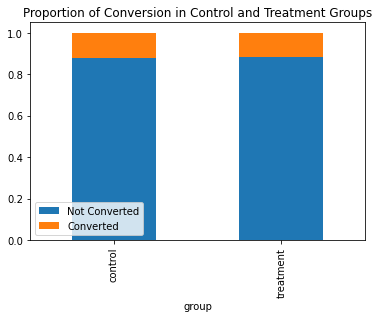

In [139]:
df.groupby('group')['converted'].value_counts(1).unstack().plot(kind='bar', stacked= True)
plt.legend(['Not Converted', 'Converted'])
plt.title('Proportion of Conversion in Control and Treatment Groups');

e. The number of times the `old_page` and `treatment` don't match.

In [13]:
# Spottig no. of mismatching entries 
df.groupby('group')['landing_page'].value_counts()

group      landing_page
control    old_page        145274
           new_page          1928
treatment  new_page        145311
           old_page          1965
Name: landing_page, dtype: int64

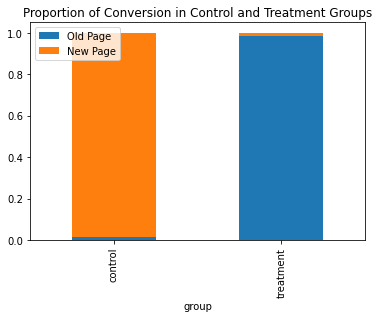

In [141]:
df.groupby('group')['landing_page'].value_counts(1).unstack().plot(kind='bar', stacked= True)
plt.legend(['Old Page', 'New Page'])
plt.title('Proportion of Conversion in Control and Treatment Groups');

In [14]:
# Another way to spot the mismatches
don_match = df[~((df.group == 'treatment') ^ (df.landing_page == 'old_page'))]
don_match.shape[0]

3893

f. Do any of the rows have missing values?

In [15]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

New missing values are detected

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [16]:
# Dropping group and landing page mismatches entries
df2 = df.drop(don_match.index, axis=0)
# Checking no. of rows after dropping mismatches
df2.shape[0],df.shape[0]

(290585, 294478)

In [17]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [18]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [19]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: object

In [20]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: object

In [21]:
df2[df2.user_id== '773192']

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [22]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [23]:
dup_user_index = df2[df2.user_id.duplicated()].index
dup_user_index

Int64Index([2893], dtype='int64')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [24]:
# Dropping duplicated user id
df2 = df2.drop(dup_user_index)

In [25]:
# Checking dropping is done
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [26]:
p_samp = df2.converted.mean()
p_samp

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [27]:
p_samp_old = df2[df2.group=='control'].converted.mean()
p_samp_old

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [28]:
p_samp_new = df2[df2.group=='treatment'].converted.mean()
p_samp_new

0.11880806551510564

In [29]:
# Summarizing conversion rates among control and treatment group
df.groupby('group',as_index=False).mean()

,group,converted
0,control,0.120399
1,treatment,0.118920


d. What is the probability that an individual received the new page?

In [30]:
(df2.landing_page == 'new_page').mean()

0.5000619442226688

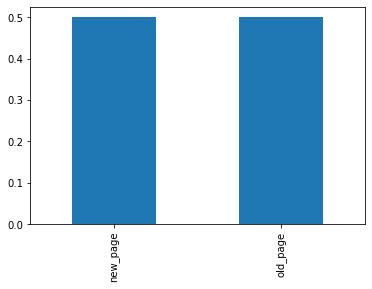

In [156]:
df2.landing_page.value_counts(1).plot(kind='bar');

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [31]:
# Calculating difference between conversion probability of new and old pages
observed_stat = p_samp_new - p_samp_old
observed_stat

-0.0015782389853555567

** On the contrary, there is a weak evidence that the old page might still be the better than the new one; due to the sample statistic of having a higher probability of conversion 12% versus 11.9% for the new page.
But the `difference is quiet small to an early judge`**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### $H_{0}$: $p_{new}$ - $p_{old}$ <= 0
#### $H_{1}$: $p_{new}$ - $p_{old}$ > 0

where p_new and p_old are representing the conversion probabilities for the new and old page, respectively.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [32]:
# As directed in Assigning total sample conversion probability to the new page conversion probability
p_null_new = p_samp
p_null_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [33]:
p_null_old = p_samp
p_null_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [34]:
n_new = len(df2[df2.group=='treatment'])
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [35]:
n_old = len(df2[df2.group=='control'])
n_old

145274

In [36]:
n_df2 = len(df2)
n_df2

290584

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [37]:
new_page_converted = np.random.choice([0, 1], n_new, p=[1-p_null_new, p_null_new], replace=True)
p_new = new_page_converted.mean()
new_page_converted, p_new


(array([0, 1, 0, ..., 1, 0, 0]), 0.11860849218911293)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [38]:
old_page_converted = np.random.choice([0, 1], n_old, p=[1-p_null_old, p_null_old], replace=True)
p_old = old_page_converted.mean()
old_page_converted, p_old


(array([1, 0, 0, ..., 0, 0, 0]), 0.12022798298387874)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [39]:
p_diff = p_new - p_old
p_diff

-0.00161949079476581

Now, we can see that the probability of mean conversion during one simulation for new page and old page, where p_old is slightly bigger too, but it could the opposite, as in this step we calculated the mean of both then subtracted it one time.

Meanwhile, in the next simulation in question (h), we will generate the new and old pages conversions arrays for 10k times; and calculate the difference in their means for 10k and storing these results in a new array

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [40]:
# Callling time stats
%time
# opening a emply list for the differences in mean between new and old pages
p_diffs = []
# Creating a loop to iterate 10k times taking random samples from the conversion rates for the 
# new and old then calculating the difference in means for each iteration
for x in range(10000):
    sim_new_page = np.random.choice([0, 1], n_new, p=[1-p_null_new, p_null_new], replace=True)
    sim_old_page = np.random.choice([0, 1], n_old, p=[1-p_null_old, p_null_old], replace=True)
    p_diffs.append(sim_new_page.mean() - sim_old_page.mean())
# Converting the list into array 
p_diffs = np.array(p_diffs)
samp_dist_std = p_diffs.std()
# Calculating Standard deviation of sampling distribution
samp_dist_std

Wall time: 0 ns


0.0012136694336751877

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

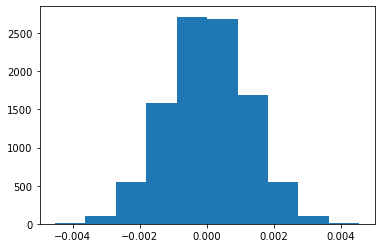

In [57]:
# Plotting histogram for the sample distribution mean difference in conversion probabilities between new and old page
plt.hist(p_diffs);

Yes it is as expected; a normal distribution curve, that would normally resulted from the boostrapping process.
Now, we are able to calculate the standard deviation of the sampling distribution, to be used afterward in simulating the null hypothesis value curve combined with the value of the null hypothesis or mean of the null.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [87]:
(p_diffs > observed_stat).mean()

0.9037

 `Beacause we follow the instruction of question (2), by making both p_new and p_old equal to the sample conversion rate, resulting that the sampling distribution mean to be Zero, so we don't have to make the null simulation step, but we will do it for the sake of practice and to ensure that it would do same result obtained from the sampling distribution of p_new = p_old`

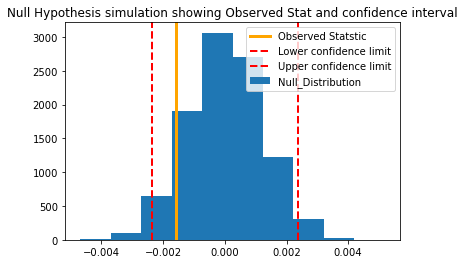

In [157]:
# Now we simulate the null using the std of the sampling distribution and the hypothesised null value
null_hyp = np.random.normal(0, samp_dist_std, 10000)

# plotting the null hypothesis Values
plt.hist(null_hyp, label= 'Null_Distribution');
plt.axvline(x=observed_stat, color='orange',
            linewidth=3, label='Observed Statstic')
plt.title('Null Hypothesis simulation showing Observed Stat and confidence interval')
plt.axvline(x=np.percentile(null_hyp, 2.5), color='r',
            linewidth=2, linestyle="--", label='Lower confidence limit')
plt.axvline(x=np.percentile(null_hyp, 97.5), color='r',
            linewidth=2, linestyle="--", label='Upper confidence limit')
plt.legend();


In [89]:
# Calculating p value which is values greater than observed stat, as the alternative hypothesis postulated
p_value_sim = (null_hyp > observed_stat).mean()
p_value_sim

0.9028

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**I've Calculated the p value; which is the probability of occurence of the observed statstic given that the null hypothesis is true, so greater p value support the higher probability that null hypothesis is true and the alternative is false.
So, the final conclusion is : `we fail to reject the null_hypothesis; consequntly the old page had higher mean probability of conversion rate than the new one` **

`And here is another method making the bootstrapping using the whole sample; not simulating [0, 1] of by conversion probabilities of new and old page only`

So in this extra part, We will walkthough the other way of doing the bootstrapping, and complete the following steps, and see if the final results would match.

In [77]:
# Importing time stats and start recording timings
import timeit as it
starting_time = it.default_timer()

diff_mean_boot = []
# Creation of a loop to do the bootstrapping drawing samples from the entire sample dataset.
for _ in range(10000):
    boot_sample = df2.sample(len(df2),replace=True)
    p_boot_old = boot_sample[boot_sample.group=='control'].converted.mean()
    p_boot_new = boot_sample[boot_sample.group=='treatment'].converted.mean()
    diff_mean_boot.append(p_boot_new - p_boot_old)
diff_mean_boot = np.array(diff_mean_boot)

# ending timing
ending_time = it.default_timer()
# show the mean of bootstrap, confidence level lower and upper limits, Booststrap standard deviatino, and finally time taken to do the loop on the entire sample dataset
diff_mean_boot.std(),(ending_time - starting_time)


(-0.001589894829703061,
 -0.0039548612302493505,
 0.0007671638455987752,
 0.0012010333044732684,
 1179.3836343000003)

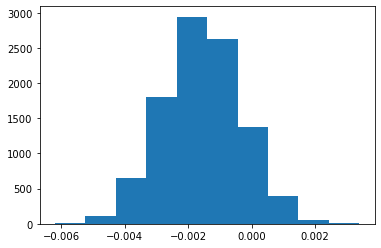

In [70]:
# Plotting Boostrapping values and the confidence level
plt.hist(diff_mean_boot);

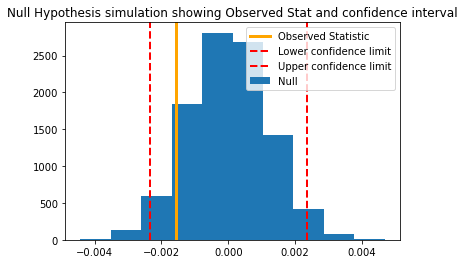

In [117]:
# SImulating the null hypothesis using hyposes value (mean) and std of bootstrapping
null = np.random.normal(0, diff_mean_boot.std(),size=10000)
plt.hist(null, label='Null');
plt.axvline(x=observed_stat, color='orange', linewidth=3, label='Observed Statistic');
plt.axvline(x=np.percentile(null, 2.5), color='r',
            linewidth=2, linestyle="--", label='Lower confidence limit')
plt.axvline(x=np.percentile(null, 97.5), color='r',
            linewidth=2,linestyle="--", label='Upper confidence limit')
plt.title('Null Hypothesis simulation showing Observed Stat and confidence interval')
plt.legend();


In [91]:
# Calculating p value which is null values greater than observed stat,since the alternative hypothesis is greater than 0
(null > observed_stat).mean()

0.9027

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [102]:
# Importing statsmodels.api
import statsmodels.api as sm
# Calculating no. of converted users in control and treatment groups
convert_old = (df2[df2.group == 'control'].converted).sum()
convert_new = (df2[df2.group == 'treatment'].converted).sum()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [103]:
# Calculating z score and p value using statsmodels.api and previous inputs
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new, convert_old]), np.array([n_new, n_old]), alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since p_value is greater than the z_score, it is much likely that observed statstic somes from the null and so we fail to reject the null hypothesis, and still the old page is more likley to get more conversion than the new one.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since output result are categorical and has only 2 choices either TRUE or FALSE (1 or 0), so `Logestic Regression` is the most approperiate model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [159]:
df2[:7]

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


In [193]:
# Adding intercept column:
df2['intercept'] = 1
# Geenrate dummies for the landing page column
df2[['ab_page','old_page']] = pd.get_dummies(df2.landing_page)
# Masking the requried column in new dataframe after re-ordering of columns, and setting user_id as index
df_log = df2[['user_id','timestamp', 'converted', 'ab_page', 'intercept']].set_index('user_id')
# Checkig results
df_log


,timestamp,converted,ab_page,intercept
user_id,,,,
851104,2017-01-21 22:11:48.556739,0,0,1
804228,2017-01-12 08:01:45.159739,0,0,1
661590,2017-01-11 16:55:06.154213,0,1,1
853541,2017-01-08 18:28:03.143765,0,1,1
864975,2017-01-21 01:52:26.210827,1,0,1
...,...,...,...,...
751197,2017-01-03 22:28:38.630509,0,0,1
945152,2017-01-12 00:51:57.078372,0,0,1
734608,2017-01-22 11:45:03.439544,0,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [194]:
# Initiating logistic model using statsmodel.api
log_model = sm.Logit(df_log.converted, df_log[['intercept','ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [195]:
#  Showing sumary fo the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:               8.077e-06
Time:                        00:01:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In contrary to the p value in the **part 2**, which was indicating the probability of seeing the observed results or one extreme result from the alternative hypothesis in the null distribution, given that the null hypothesis is true, so a higher p value than the 0.05% of type1 error margin indicate that we can not reject the null hypothesis, while the lesser p value indicate that we can reject the null hypothesis, `Meanwhile`;



A higher p value than o.o5 in the **logestic regression model** represents a higher probability that the independent (landing page) is not statistically significant in predicting the dependent variable(conversion),and this result may be came by chance, hwile if the p value was losser than 0.05, that would indicate that there is correlation between them and landing page is statistically significant in predicting the conversion rate, which is not the case.

>`So despite the diffrent values of p values across the simulation of null and the regression model; both lead to relevant conclusions, that the new landing page (in the simulation of null) or  the landing page in general (in regression model) could not prove a statistical significant in prediction of the conversion.`

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Since langing page failed statistically to predict the conversion, so adding and analyzing another features may (and may not) help us predicting the conversion rates, `but` generally, adding more factors could lead to other diadvantages too, such as gathering 2 or more correlated independent variables causing interaction, or adding irrelevant feature that could miss with a working model, which is not the case here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [213]:
# Reading countries csv
countries = pd.read_csv(
    r'D:\Personal\Udacity Data Analysis Course\Advanced Data Analysis Track\Projects\Project 2 - Analyze A B test results\Datasets\countries.csv').astype(str)
# Exploring dataset and finding no. of countries presented in
countries.info(), countries.country.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  290584 non-null  object
 1   country  290584 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


(None,
 US    203619
 UK     72466
 CA     14499
 Name: country, dtype: int64)

In [218]:
# generating dummies
countries[['CA','UK','US']] = pd.get_dummies(countries.country)
countries

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0
...,...,...,...,...,...
290579,653118,US,0,0,1
290580,878226,UK,0,1,0
290581,799368,UK,0,1,0
290582,655535,CA,1,0,0


In [224]:
# Combinig the two datasets
df_log2 = countries.set_index('user_id').join(df2.set_index('user_id'), how= 'inner')
# Selection of relevant coumns and arranging it
df_log2 = df_log2[['UK',
                   'US',
                   'converted',
                   'intercept',
                   'ab_page']]
df_log2


,UK,US,converted,intercept,ab_page
user_id,,,,,
834778,1,0,0,1,0
928468,0,1,0,1,1
822059,1,0,1,1,1
711597,1,0,0,1,0
710616,1,0,0,1,1
...,...,...,...,...,...
653118,0,1,0,1,0
878226,1,0,0,1,0
799368,1,0,0,1,0


In [226]:
# Initiating logistic model using statsmodel.api
log_model = sm.Logit(df_log2.converted, df_log2[['intercept','UK', 'US']])
results = log_model.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:               1.521e-05
Time:                        00:28:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

>`Conclusion: both p values for UK and US are higher than 0.05 (type-1 error), so we failed to reject the null hypothesis again, and neither countries have significant probabiity to predict the conversion rates.`

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [230]:
#  Adding extra 2 columns to present the possible interaction between countries and landing pages
df_log2['UK_new_page'] = df_log2['UK']*df_log2['ab_page']
df_log2['US_new_page'] = df_log2['US']*df_log2['ab_page']
# Assigning new mask and re-ordering columns, just for clarity/cleaniness; as it doesn't affect the regression model
df_log3 = df_log2[['converted'	, 'UK',	'US'	,'ab_page',
                   'UK_new_page',	'US_new_page', 'intercept']]
df_log3

,converted,UK,US,ab_page,UK_new_page,US_new_page,intercept
user_id,,,,,,,
834778,0,1,0,0,0,0,1
928468,0,0,1,1,0,1,1
822059,1,1,0,1,1,0,1
711597,0,1,0,0,0,0,1
710616,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...
653118,0,0,1,0,0,0,1
878226,0,1,0,0,0,0,1
799368,0,1,0,0,0,0,1


<AxesSubplot:>

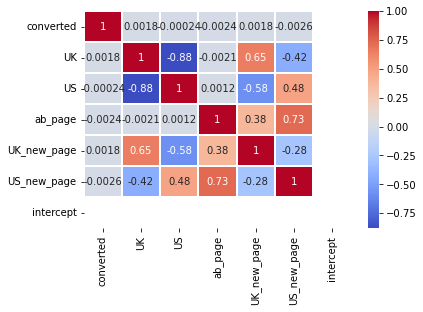

In [235]:
# importing seaborn to study the correlation heatmap
import seaborn as sns
sns.heatmap(df_log3.corr(), annot=True, cmap='coolwarm', linewidth=2);


>`No correlation is found between conversion and neither of the features`

In [231]:
# Initiating logistic model on all the featues all together
log_model = sm.Logit(df_log3.converted, df_log3[['intercept', 'UK', 'US', 'ab_page',
                                                 'UK_new_page',	'US_new_page']])
results = log_model.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:               3.482e-05
Time:                        00:46:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page        -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_new_page     0.0469      0.054      0.872      0.383      -0.059       0.152
===============================================================================
"""

>`Since the p values for the interaction between countries and landing page are higher than the type-1 error of 0.05, so we still can't reject the hypothesis null; indicating that even this interaction doesn't have a statistical significance on predicting the conversion rate.`

<a id='conclusions'></a>
## Summary and Final Conclusion:

We have done an A/B testing for an e-commerce webpage that wants to know weather to launch a new landing page or not, based on the conversion rate that it may afffect.

After intial exploration of the data, we've done data wrangling, followed by identification of some key charactersitics of the dataset that would help us onward, followed by postulating the null hypothesis, which was that the new page doesn't exceed the old page in conversion rate and the contrary of it; the alternative hypothesis.

Then, we've done bootstraping and simulation for the conversion rates for each of the new and old page by 2 methods; the ordinary bootstraing method, and a random simulation with 0 and 1 using np.random.choice, followed by simulation for the null hypothesis; plotting it along with the observed stastic and the confidence interval, and calculating the p value in each of the methods and find it 0.9% which far higher than the 0.05 type-1 error, so the final conclusion for the hypothesis testing part (1 and 2) was:
`we failed to reject the null hypothesis and the new page had lower probability to produce higher conversion rates than the older one.`

Then we moved to the third part; `Part 3`, where we've fit a logistical regression model, studying the probability of some features to predict the conversion rate, and we've tested one featue at a time first, which was the new page, followed by the country of the user alone, and in both steps we've reached a higher p values than the type-1 error and so we cocuded that: `**neither** new page nor country had a statistically significant probability predicting the conversion rate.`

Finally, we have run the regression model on all the features including the interaction between countries and landing page, and again: `we found **NO** statistical significance of both interactions predicting the conversion rate.`

>## `So, the final conclusion is: after A/B testing and using logistic regression model, we find `**NO**` statistical significance supporting the probability that new page could increase conversion rate, or could be used alone or combined with countries of users, to predict the conversion rate.`




## Limitations:
- We didn't study the timestamp feature for the duplicated users, that might/might not add more insights about the user behavior regarding the conversion rate.
- We don't have other data regarding the users novelty, as `novel` users may interact immedicately when encountering something that attract them, but old users may experience the `change aversion` attitude, at least for a while.
- We don't know wheather the `duration` of the study sampling is suitable for this purpose of the study or not.
- There could be other critical `metrics` we don't know/consider about that would contribute significantly either alone or combined to the conversion rate.
- we dont' have nor considered other critical `practical significant factors` such as:
    - Cost of the development of the new page verus anticipated revenues (`profitability`)
    - The `competitive position` of the entity, versus the closest competitor(s)  or 2nd best option.
    - Product life cycle `(PLC)`, which could add extra weight on obvious change, even if it was cosmic in nature, in certain phases of PLC, such as the decline phase.
    - Weather there's other relevant context or not, such as branding or re-branding  or re-positiong `marketing campaigns`.

## Resources:
https://pandas.pydata.org
https://datagy.io/reorder-pandas-columns/
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests
https://pynative.com/python-random-sample/
https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest
https://classroom.udacity.com/
youtube.com



In [232]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1